# Introduction

Disclaimer: The code for this notebook is mainly based on [Krastanov blog post on Schwarzschild solution.](https://krastanov.wordpress.com/2012/07/22/the-schwarzschild-solution/) A special thanks for his amazing blog.

A simple solution to the Einstein equation in free space is the spherically symmetric Schwarzschild solution. In this notebook we weill demonstrate how one can use the diffgeom module to solve Einstein equations for this metric. One starts with the most general spherically symmetrical metric and by using Einstein equation in vacuum $R_{\mu \nu} = 0$ deduces the equations that must be fulfilled by the components of the metric (in the chosen basis).

## Online References

* https://krastanov.wordpress.com/2012/07/22/the-schwarzschild-solution/
* https://krastanov.files.wordpress.com/2012/07/schwarzschild.pdf
* https://nbviewer.jupyter.org/github/sympy/sympy/tree/master/examples/notebooks/
* https://docs.sympy.org/latest/modules/tensor/tensor.html
* https://arxiv.org/pdf/1703.09738.pdf
* https://docs.sympy.org/latest/modules/diffgeom.html
* https://pypi.org/project/spacetimeengine/
* https://blog.krastanov.org/tag/differential-geometry/
* http://omz-software.com/pythonista/sympy/modules/diffgeom.html

## Schwarzschild Solution Derivation

* https://web.stanford.edu/~oas/SI/SRGR/notes/SchwarzschildSolution.pdf
* https://www.coursera.org/lecture/general-relativity/schwarzschild-solution-USmSZ
* http://www.physics.ucc.ie/apeer/PY4112/Sch.pdf

## Differential Geometry
* https://www.zweigmedia.com/pdfs/DiffGeom.pdf

In [12]:
import sympy as sym
import numpy as np
import math
from einsteinpy.symbolic import MetricTensor, ChristoffelSymbols, RiemannCurvatureTensor

sym.init_printing() 

In [2]:
from sympy.diffgeom import *
TP = TensorProduct

In [3]:
m = Manifold('Schwarzschild', 4)
p = Patch('origin', m)
cs = CoordSystem('spherical', p, ['t', 'r', 'theta', 'phi'])

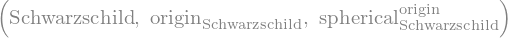

In [4]:
m, p, cs

In [5]:
t, r, theta, phi = cs.coord_functions()
t, r, theta, phi

In [6]:
dt, dr, dtheta, dphi = cs.base_oneforms()
dt, dr, dtheta, dphi

In [32]:
from sympy import Function

f = sym.Function('f')(r)
g = sym.Function('g')(r)

metric = sym.exp( 2 * f ) * TP(dt, dt) - sym.exp( 2 * g ) * TP(dr, dr) \
- r**2 * TP(dtheta, dtheta) - r**2 * sym.sin(theta)**2 * TP(dphi, dphi)

metric

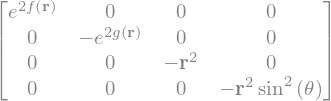

In [33]:
twoform_to_matrix(metric)

In [34]:
ricci = metric_to_Ricci_components(metric)

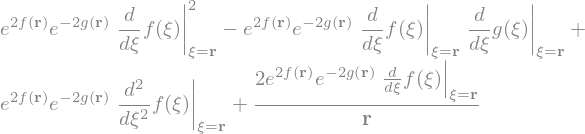

In [36]:
ricci[0][0]

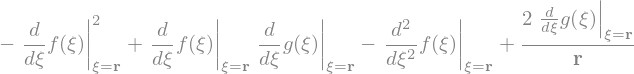

In [37]:
ricci[1][1]

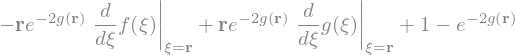

In [38]:
ricci[2][2]

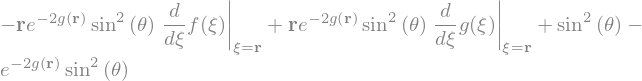

In [39]:
ricci[3][3]

In [40]:
all(ricci[i][j]==0 for i in range(4) for j in range(4) if i!=j)

True

In [46]:
diffgeom_simplify = lambda a: a.subs(zip(cs.coord_functions(), cs._dummies)).simplify().subs(zip(cs._dummies, cs.coord_functions())) 
ricci = [[diffgeom_simplify(ricci[i][j])
 for j in range(4)] for i in range(4)]
ch_2nd = metric_to_Christoffel_2nd(metric)

filt = [((i,j,k), diffgeom_simplify(ch_2nd[i][j][k]))
 for i in range(4) for j in range(4) for k in range(j,4)
 if ch_2nd[i][j][k]!=0]

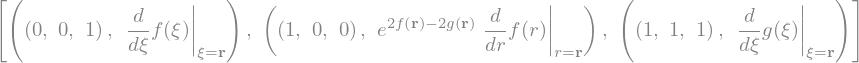

In [47]:
filt[0:3]

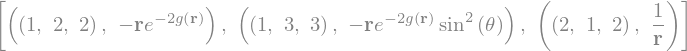

In [48]:
filt[3:6]

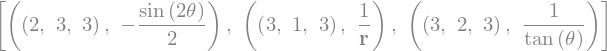

In [49]:
filt[6:9]